### Match and questionnaire data from speed dating experiment run by Columbia professors Ray Fisman and Sheena Iyengar

https://data.world/annavmontoya/speed-dating-experiment

Data collection is doubtful.

In [105]:
# reload(clean)
import clean
df, d = clean.prep()

mapping field_cd
mapping date
mapping career_c
mapping go_out
mapping race
mapping samerace
mapping gender
mapping condtn
mapping goal
pid 1 552
dec_o 0 1
match 0 1


In [106]:
d.shape, df.shape

((8368, 53), (4184, 101))

In [68]:
import seaborn

In [151]:
# cols = [x for x in d.columns if not x.endswith('_o')]
dd = d.groupby(['iid']).first()

In [152]:
cols = ['imprace', 'race', 'gender']
ds = dd[cols]

In [153]:
dd.pivot_table(values=['imprace'], index=['race'], columns=['gender'], aggfunc='count', margins=True)

imprace              
gender                                 Female   Male    All
race                                                       
Asian/Pacific Islander/Asian-American    71.0   65.0  136.0
Black/African American                   16.0   10.0   26.0
European/Caucasian-American             141.0  162.0  303.0
Latino/Hispanic American                 25.0   17.0   42.0
Other                                    16.0   21.0   37.0
All                                     269.0  275.0  544.0

In [155]:
dd.pivot_table(values=['pid'], index=['gender', 'race'], columns=['imprace'],
               aggfunc='count', margins=True, fill_value=0)

pid                                                                    
imprace                                       0.0    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0    All
gender race                                                                                                          
Female Asian/Pacific Islander/Asian-American  0.0   24.0  10.0  10.0   3.0   5.0   5.0   3.0   5.0   4.0   2.0   71.0
       Black/African American                 0.0    5.0   3.0   0.0   1.0   1.0   0.0   4.0   1.0   1.0   0.0   16.0
       European/Caucasian-American            1.0   34.0  16.0  14.0  12.0  11.0   5.0   5.0  19.0  12.0  12.0  141.0
       Latino/Hispanic American               0.0   12.0   2.0   4.0   0.0   4.0   1.0   0.0   1.0   1.0   0.0   25.0
       Other                                  0.0    4.0   3.0   2.0   0.0   3.0   3.0   0.0   1.0   0.0   0.0   16.0
Male   Asian/Pacific Islander/Asian-American  0.0   31.0   3.0   9.0   5.0   3.0   4.0   5.0   2.0   2.0   1.0   65.0
       Black/African American                 0.0    5.0   1.0   1.0   2.0   0.0   0.0   1.0   0.0   0.0   0.0   10.0
       European/Caucasian-American            0.0   55.0  18.0  17.0   8.0  15.0  14.0  16.0  12.0   5.0   2.0  162.0
       Latino/Hispanic American               0.0    7.0   1.0   6.0   2.0   0.0   1.0   0.0   0.0   0.0   0.0   17.0
       Other                                  0.0   12.0   3.0   2.0   0.0   1.0   1.0   1.0   1.0   0.0   0.0   21.0
All                                           1.0  189.0  60.0  65.0  33.0  43.0  34.0  35.0  42.0  25.0  17.0  544.0

In [145]:
dd.pivot_table(values=['imprace'], index=['race'], columns=['gender'], aggfunc='mean', margins=True, fill_value=0)

imprace                    
gender                                   Female      Male       All
race                                                               
Asian/Pacific Islander/Asian-American  3.633803  3.107692  3.382353
Black/African American                 4.062500  2.500000  3.461538
European/Caucasian-American            4.652482  3.740741  4.165017
Latino/Hispanic American               2.840000  2.411765  2.666667
Other                                  3.562500  2.380952  2.891892
All                                    4.115242  3.360000  3.733456

In [120]:
s = ds.groupby(['race', 'gender']).size()
s.sort_values()

race                                   gender
Black/African American                 Male       10
                                       Female     16
Other                                  Female     16
Latino/Hispanic American               Male       17
Other                                  Male       21
Latino/Hispanic American               Female     25
Asian/Pacific Islander/Asian-American  Male       65
                                       Female     71
European/Caucasian-American            Female    142
                                       Male      162
dtype: int64

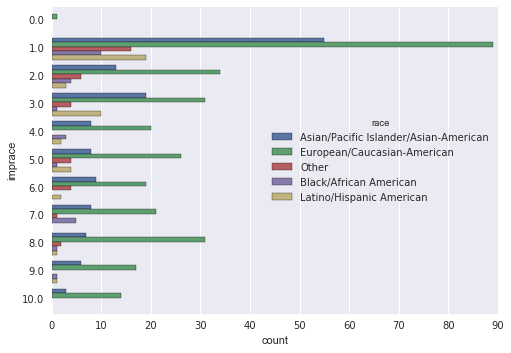

In [104]:
seaborn.countplot(y='imprace', hue='race', data=dd)

In [3]:
c = ['dec_female', 'dec_male', 'match_female']
y = df[c]
other = ['attr_o_male', 'attr_o_female']
xc = [x for x in df if x not in c and x not in other]
X_ = df[xc]

In [161]:
import xgboost as xgb
clf_ = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=np.nan, n_estimators=30, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

In [162]:
X = pd.get_dummies(X_)
print(X.shape)

(4184, 3330)


In [163]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y)

In [168]:
k = 'dec_female'
clf_.fit(X_train, y_train[k], eval_set=[(X_train, y_train[k]), (X_test, y_test[k])],
         eval_metric='auc', early_stopping_rounds=20)
s = pd.Series(clf_.feature_importances_, index=X.columns)
s = s[s>0.01]
s.sort()

[0]	validation_0-auc:0.610658	validation_1-auc:0.568494
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.656038	validation_1-auc:0.603827
[2]	validation_0-auc:0.680421	validation_1-auc:0.621492
[3]	validation_0-auc:0.707101	validation_1-auc:0.639155
[4]	validation_0-auc:0.71663	validation_1-auc:0.645138
[5]	validation_0-auc:0.729496	validation_1-auc:0.664785
[6]	validation_0-auc:0.732545	validation_1-auc:0.665351
[7]	validation_0-auc:0.736985	validation_1-auc:0.668402
[8]	validation_0-auc:0.743124	validation_1-auc:0.670843
[9]	validation_0-auc:0.745777	validation_1-auc:0.669751
[10]	validation_0-auc:0.75077	validation_1-auc:0.671087
[11]	validation_0-auc:0.75739	validation_1-auc:0.678678
[12]	validation_0-auc:0.762655	validation_1-auc:0.681195
[13]	validation_0-auc:0.766096	validation_1-auc:0.682487
[14]	validation_0-auc:0.769984	validation_1-auc:0.688768
[

/Users/davidcottrell/anaconda/envs/35/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  


Populating the interactive namespace from numpy and matplotlib


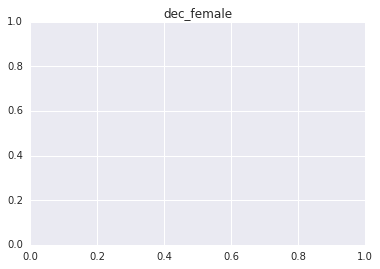

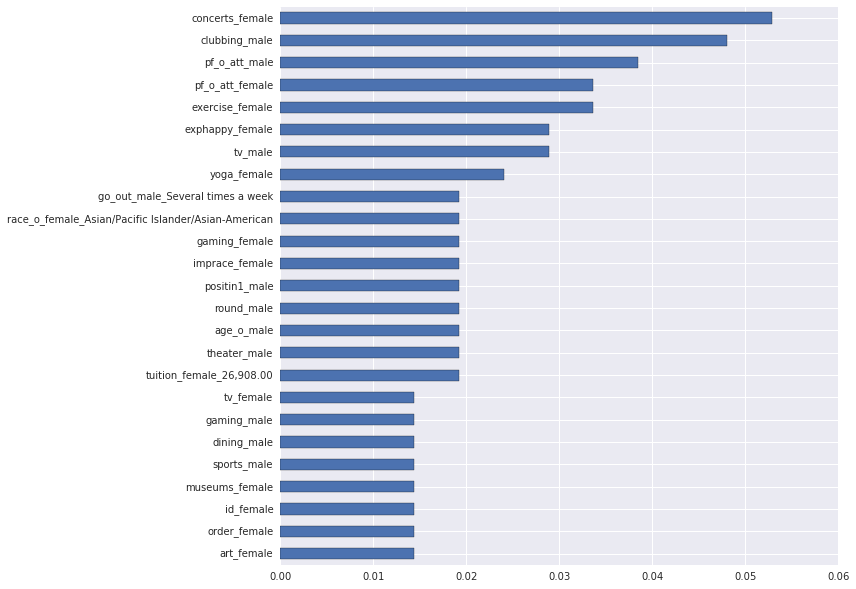

In [169]:
%pylab inline

title(k)
figure(figsize=(10, 10))
s.plot(kind='barh')

In [24]:
k = 'dec_male'
clf_.fit(X_train, y_train[k], eval_set=[(X_train, y_train[k]), (X_test, y_test[k])], eval_metric='auc', early_stopping_rounds=20)
s = pd.Series(clf_.feature_importances_, index=X.columns)
s = s[s>0.01]
s.sort()

[0]	validation_0-auc:0.579169	validation_1-auc:0.574767
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.641574	validation_1-auc:0.597294
[2]	validation_0-auc:0.675199	validation_1-auc:0.601683
[3]	validation_0-auc:0.689623	validation_1-auc:0.619728
[4]	validation_0-auc:0.701412	validation_1-auc:0.644033
[5]	validation_0-auc:0.714197	validation_1-auc:0.662495
[6]	validation_0-auc:0.723296	validation_1-auc:0.662109
[7]	validation_0-auc:0.735347	validation_1-auc:0.668344
[8]	validation_0-auc:0.737528	validation_1-auc:0.676899
[9]	validation_0-auc:0.742724	validation_1-auc:0.687379
[10]	validation_0-auc:0.745285	validation_1-auc:0.689888
[11]	validation_0-auc:0.750856	validation_1-auc:0.690698
[12]	validation_0-auc:0.754987	validation_1-auc:0.692589
[13]	validation_0-auc:0.759927	validation_1-auc:0.688212
[14]	validation_0-auc:0.764547	validation_1-auc:0.69144

/Users/davidcottrell/anaconda/envs/35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  """


In [25]:
s

positin1_female       0.011218
sports_male           0.011218
pf_o_att_male         0.011218
hiking_male           0.011218
exercise_female       0.011218
concerts_female       0.011218
position_female_14    0.011218
order_female          0.011218
id_female             0.011218
sports_female         0.012821
exercise_male         0.014423
clubbing_female       0.014423
concerts_male         0.014423
movies_male           0.014423
music_female          0.014423
yoga_female           0.014423
partner_male          0.016026
museums_male          0.016026
age_o_male            0.017628
gaming_male           0.017628
shopping_male         0.019231
yoga_male             0.019231
imprace_female        0.020833
tv_female             0.022436
pf_o_att_female       0.022436
movies_female         0.022436
positin1_male         0.022436
age_o_female          0.024038
imprace_male          0.024038
tvsports_female       0.028846
int_corr_female       0.032051
dtype: float32

Populating the interactive namespace from numpy and matplotlib


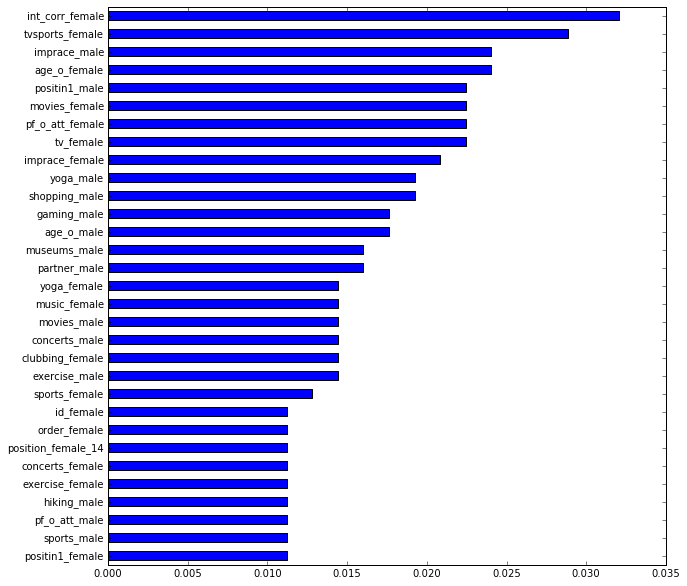

In [26]:
%pylab inline
figure(figsize=(10, 10))
s.plot(kind='barh')

In [27]:
k = 'match_female'
clf_.fit(X_train, y_train[k], eval_set=[(X_train, y_train[k]), (X_test, y_test[k])], eval_metric='auc', early_stopping_rounds=20)
s = pd.Series(clf_.feature_importances_, index=X.columns)
s = s[s>0.01]
s.sort()

[0]	validation_0-auc:0.523394	validation_1-auc:0.508001
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.532821	validation_1-auc:0.519418
[2]	validation_0-auc:0.556054	validation_1-auc:0.525056
[3]	validation_0-auc:0.566342	validation_1-auc:0.529909
[4]	validation_0-auc:0.57334	validation_1-auc:0.533799
[5]	validation_0-auc:0.612262	validation_1-auc:0.539682
[6]	validation_0-auc:0.619859	validation_1-auc:0.538122
[7]	validation_0-auc:0.653217	validation_1-auc:0.553235
[8]	validation_0-auc:0.663016	validation_1-auc:0.562626
[9]	validation_0-auc:0.69713	validation_1-auc:0.525274
[10]	validation_0-auc:0.704962	validation_1-auc:0.520018
[11]	validation_0-auc:0.718193	validation_1-auc:0.536405
[12]	validation_0-auc:0.723232	validation_1-auc:0.534498
[13]	validation_0-auc:0.729157	validation_1-auc:0.536756
[14]	validation_0-auc:0.731396	validation_1-auc:0.540741


/Users/davidcottrell/anaconda/envs/35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  """


In [28]:
s

hiking_male        0.010033
sports_male        0.010033
gaming_female      0.010033
yoga_female        0.010033
music_male         0.011706
theater_female     0.011706
positin1_female    0.011706
museums_female     0.011706
order_male         0.013378
age_o_male         0.013378
tvsports_female    0.013378
museums_male       0.013378
movies_female      0.013378
art_female         0.013378
exercise_female    0.015050
positin1_male      0.015050
art_male           0.015050
order_female       0.015050
int_corr_male      0.015050
pf_o_att_male      0.016722
clubbing_male      0.016722
exphappy_female    0.016722
id_male            0.016722
concerts_female    0.016722
reading_male       0.020067
clubbing_female    0.020067
age_o_female       0.020067
imprace_male       0.021739
imprace_female     0.025084
tvsports_male      0.025084
pf_o_att_female    0.036789
int_corr_female    0.043478
dtype: float32

Populating the interactive namespace from numpy and matplotlib


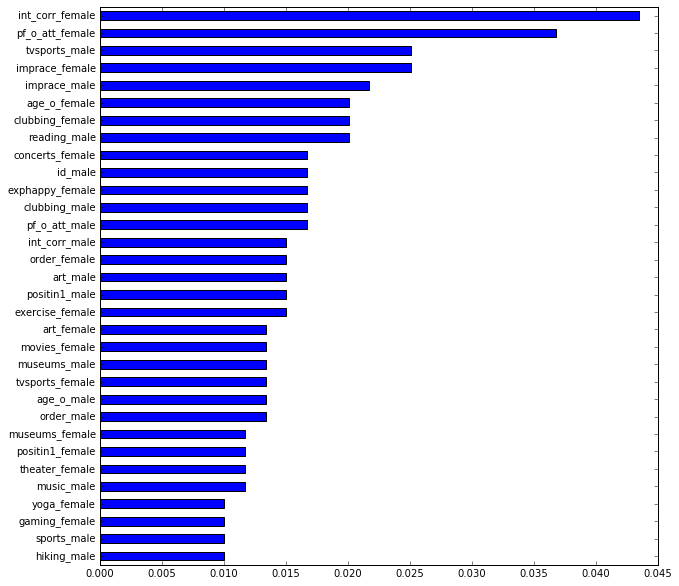

In [29]:
%pylab inline
figure(figsize=(10, 10))
s.plot(kind='barh')